In [1]:
import numpy as np
import sklearn
import mglearn
import matplotlib.pyplot as plt

/home/inory/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/inory/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# k均值聚类

k均值交替执行两个步骤:

- 将每个数据点分配给最近的簇中心
- 将每个簇中心设置为所分配的所有数据点的平均值

## 聚类算法流程

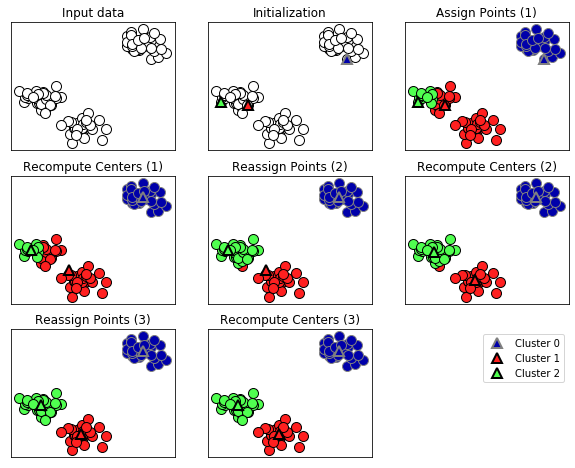

In [2]:
mglearn.plots.plot_kmeans_algorithm()

## 聚类决策边界

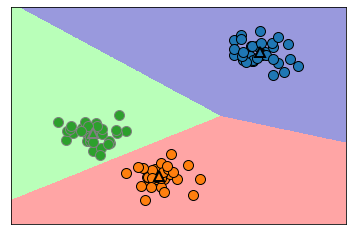

In [3]:
mglearn.plots.plot_kmeans_boundaries()

## k均值算法找到簇中心和边界

shape of X: (100, 2)
Cluster memberships:
 [0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]
predit of X:
 [0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


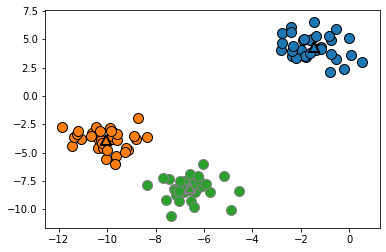

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 生成模拟的二维数据
X, y = make_blobs(random_state=1)
print('shape of X:', X.shape)

# 构建聚类模型
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# 聚类为每一个样本生成类标签
print('Cluster memberships:\n', kmeans.labels_)

# 该结果与在训练集上预测的结果一致
print('predit of X:\n', kmeans.predict(X))

# 可视化聚类结果
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                         kmeans.cluster_centers_[:, 1],
                         [0, 1, 2], markers='^', markeredgewidth=2)
plt.show()

使用不同簇中心数目的结果

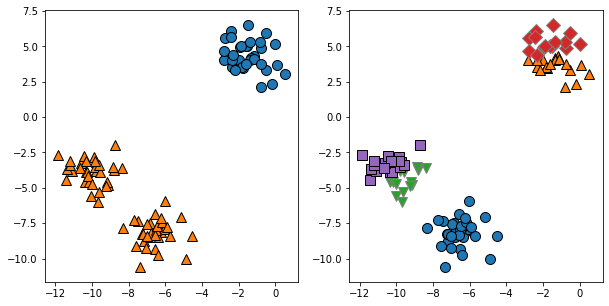

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# 2个簇中心
kmeans = KMeans(n_clusters=2).fit(X)
assigments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assigments, ax=axes[0])
# 5个簇中心
kmeans = KMeans(n_clusters=5).fit(X)
assigments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assigments, ax=axes[1])
plt.show()

## k均值失败案例

k均值算法特性决定聚类结果都是凸形,不能应用于复杂情况.

### 不同密度数据

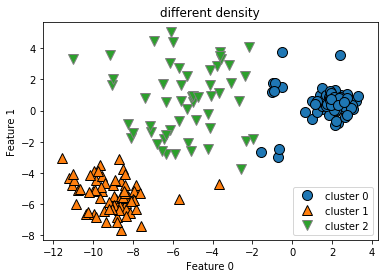

In [6]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)

y_pred = KMeans(n_clusters=3).fit_predict(X_varied)

plt.title('different density')
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc='best')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

### 非球形簇

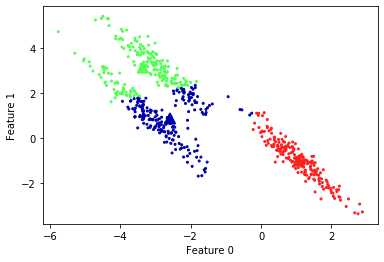

In [7]:
# 生成一些随机分组数据
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 变换数据使其拉长
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3, s=4)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker='^', c=[0, 1, 2], s=100,
            linewidth=2, cmap=mglearn.cm3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

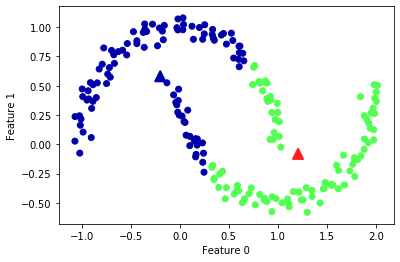

In [8]:
# 生成模拟的 two_moons数据

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 将数据聚类成2个簇
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidths=2)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

## 矢量量化

使用k均值尝试利用每一个数据中心表示每一个数据点。

### 使用 PCA、NMF、k均值提取分量，并重建人脸

#### 加载人脸数据集

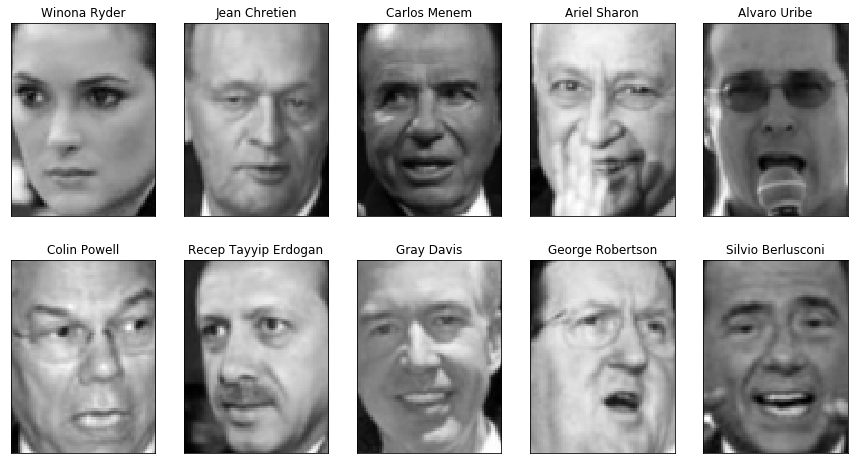

image shape: (3023, 87, 65)
num of classes: 62
Alejandro Toledo          39     Alvaro Uribe              35     Amelie Mauresmo           21     
Andre Agassi              36     Angelina Jolie            20     Ariel Sharon              77     
Arnold Schwarzenegger     42     Atal Bihari Vajpayee      24     Bill Clinton              29     
Carlos Menem              21     Colin Powell             236     David Beckham             31     
Donald Rumsfeld          121     George Robertson          22     George W Bush            530     
Gerhard Schroeder        109     Gloria Macapagal Arroyo   44     Gray Davis                26     
Guillermo Coria           30     Hamid Karzai              22     Hans Blix                 39     
Hugo Chavez               71     Igor Ivanov               20     Jack Straw                28     
Jacques Chirac            52     Jean Chretien             55     Jennifer Aniston          21     
Jennifer Capriati         42     Jennifer Lopez      

In [9]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)


# 绘制人脸图像
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_title(people.target_names[target])

plt.show()

# 获取数据集信息
print('image shape:', people.images.shape)
print('num of classes:', len(people.target_names))

# 分类数目统计

counts = np.bincount(people.target)

for i, (name, count) in enumerate(zip(people.target_names, counts)):
    print('{:25}{:3}'.format(name, count), end='     ')  # 字符串默认靠左排列，数字默认靠右排列
    if (i + 1) % 3 == 0:
        print()
        
# 每个分类最多取50个样本构造数据集
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][: 50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255

print()
print('num of sample:', len(X_people))

#### 使用PCA，NMF，k-均值提取，并重构数据

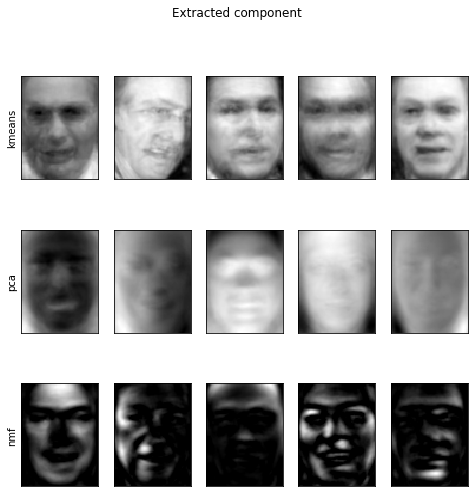

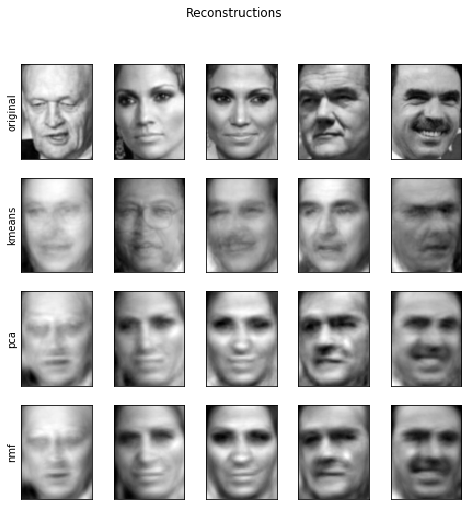

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

# 重构的数据
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks':(), 'yticks':()})

fig.suptitle('Extracted component')
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
    axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
        ax[0].imshow(comp_kmeans.reshape(people.images[0].shape), cmap=plt.cm.gray)
        ax[1].imshow(comp_pca.reshape(people.images[0].shape), cmap=plt.cm.gray)
        ax[2].imshow(comp_nmf.reshape(people.images[0].shape), cmap=plt.cm.gray)

axes[0, 0].set_ylabel('kmeans')
axes[1, 0].set_ylabel('pca')
axes[2, 0].set_ylabel('nmf')

fig, axes = plt.subplots(4, 5, figsize=(8, 8), subplot_kw={'xticks':(), 'yticks':()})
fig.suptitle('Reconstructions')
for ax, orign, rec_kmeans, rec_pca, rec_mnf in zip(
    axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
    X_reconstructed_nmf):
        ax[0].imshow(orign.reshape(people.images[0].shape), cmap=plt.cm.gray)
        ax[1].imshow(rec_kmeans.reshape(people.images[0].shape), cmap=plt.cm.gray)
        ax[2].imshow(rec_pca.reshape(people.images[0].shape), cmap=plt.cm.gray)
        ax[3].imshow(rec_mnf.reshape(people.images[0].shape), cmap=plt.cm.gray)

axes[0, 0].set_ylabel('original')
axes[1, 0].set_ylabel('kmeans')
axes[2, 0].set_ylabel('pca')
axes[3, 0].set_ylabel('nmf')

plt.show()

k均值矢量量化可以用比输入维度更多的簇对数据进行编码

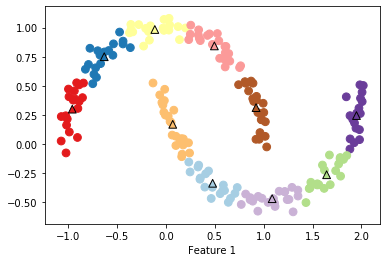

Cluster member ships:
 [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


In [11]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidths=1, cmap='Paired', edgecolors='black')
plt.xlabel('Feature 0')
plt.xlabel('Feature 1')
plt.show()
print('Cluster member ships:\n',y_pred)

In [12]:
print('原始数据编码：\n',X[:2])
print('矢量量化后的数据编码：\n',np.array(np.eye(10)[y_pred[:2]]))
print('使用簇距离而不是分类结果：\n', kmeans.transform(X)[:2])

原始数据编码：
 [[ 0.81680544  0.5216447 ]
 [ 1.61859642 -0.37982927]]
矢量量化后的数据编码：
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
使用簇距离而不是分类结果：
 [[0.9220768  1.46553151 1.13956805 0.45416272 1.78820579 0.82573711
  1.02576102 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  1.66005101 2.66446252 1.64355994
  0.53925926 0.70700803 2.20414144 0.98271691]]


# 凝聚聚类（agglomerative clustering）

算法首先指定每个点独立形成簇，之后合并两个最相似的簇，直到满足停止条件为止，几种合并策略：

- ward: 和并簇后使得所有簇中的方差增加最小
- average: 簇中所有点之间平均距离之和最小的簇进行合并
- complete：所有点的最大距离最小的两个簇进行合并

ward适用于大多数数据集，只有在簇间样本数相差很大的时候不适用。

凝聚算法不能对新的数据点进行预测

## 聚类算法演示

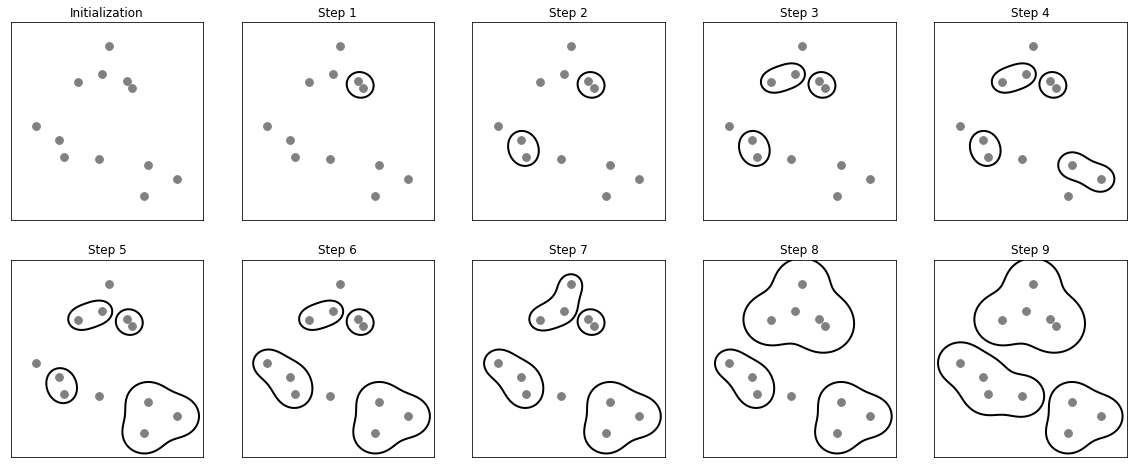

In [13]:
mglearn.plots.plot_agglomerative_algorithm()

## 凝聚聚类效果

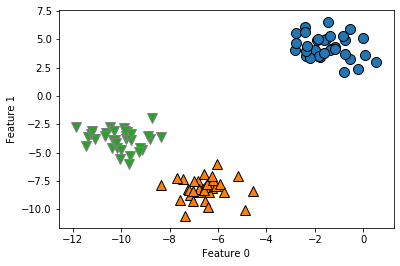

In [14]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assigment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assigment)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

## 层次聚类与树状图

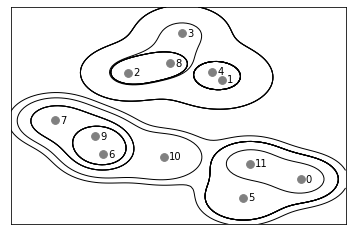

In [15]:
mglearn.plots.plot_agglomerative()

### 使用树状图可视化层次聚类的结果

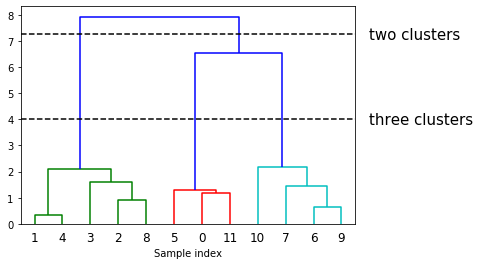

In [16]:
# 从SciPy 导入dendrogram函数和 ward聚类函数
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# 将ward聚类应用于数据数组X
# 将SciPy的ward函数返回一个数组，指定执行凝聚聚类时跨越的距离
linkage_array = ward(X)
# 绘制树状图
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1]+5, 7.25, 'two clusters', va='center', fontdict={'size':15})
ax.text(bounds[1]+5, 4, 'three clusters', va='center', fontdict={'size':15})
plt.xlabel('Sample index')
plt.show()

# DBSCAN（density-based spatial clustering of applications with noise）

- 不需要先验地设置簇的个数，可以划分具有复杂形状的簇
- 数据点靠近在一起的区域称为密集区域，里面的点被称为核心点
- DBSCAN划分簇形成密集区域，由相对较空的区域分隔开
- 包括三种点，核心点，边界点，噪声
- 划分依据为距离eps和距离内的最小样本数min_samples

## 不合适的参数选择

In [17]:
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=30)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

print('cluster memberships:\n', clusters)
print('y:\n', y)

cluster memberships:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
y:
 [0 2 2 2 1 0 1 2 1 2 2 2 2 1 0 0 1 0 2 0 1 1 0 0 0 1 1 1 2 0]


## 不同的参数选择结果

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


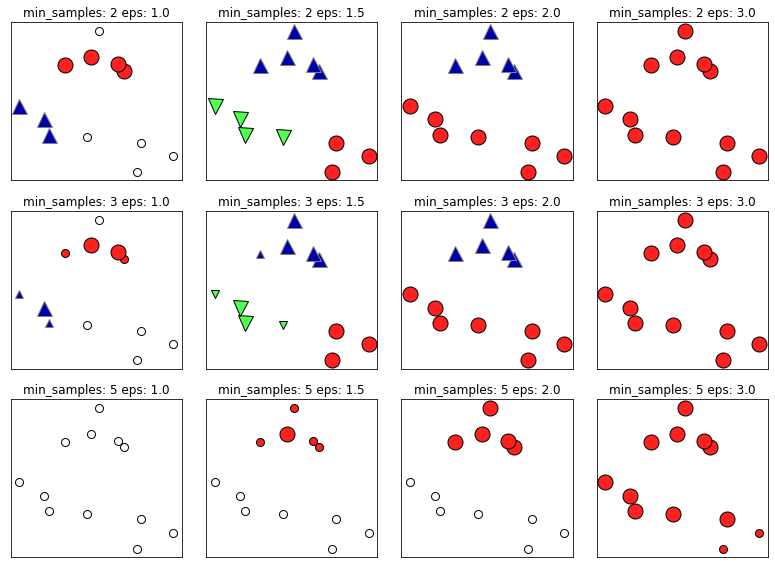

In [18]:
mglearn.plots.plot_dbscan()

## DBSCAN 处理非球形簇

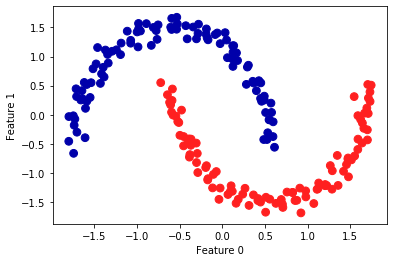

In [19]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 将聚类缩放成均值为0，方差为1
X_scalled = sklearn.preprocessing.StandardScaler().fit_transform(X)
clusters = DBSCAN().fit_predict(X_scalled)

plt.scatter(X_scalled[:, 0], X_scalled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

# 聚类算法的评估比较

## 用真实值进行评估

评估聚类算法相对于真实聚类的结果，具体评估指标主要有:

- 调整rand指数 (adjusted rand index, ARI)
- 归一化互信息（normalized mutual information, NMI）

指标最佳为1， 0表示不相关的聚类

### ARI调整rand指数比较 k均值、凝聚聚类、DBSCAN算法效果

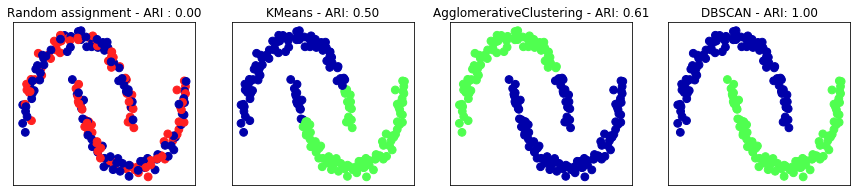

In [20]:
from sklearn.metrics import adjusted_rand_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 标准缩放
X_scalled = sklearn.preprocessing.StandardScaler().fit_transform(X)

# 聚类算法
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
# 创建随机簇分配作为比较
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 绘制随机分簇结果， 计算调整rank指数
axes[0].scatter(X_scalled[:, 0], X_scalled[:, 1], c=random_clusters, cmap=mglearn.cm2, s=60)
axes[0].set_title('Random assignment - ARI : {:.2f}'.format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 绘制簇分配和簇中心
    clusters = algorithm.fit_predict(X_scalled)
    ax.scatter(X_scalled[:, 0], X_scalled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title('{} - ARI: {:.2f}'.format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

plt.show()

### 聚类结果的评估与分类结果的评估

聚类结果应当使用 ARI:adjusted_rand_score或者是NMI:normalized_mutual_info_score。

不应当使用分类中的accuracy_score指标，因为聚类结果的标签数字没有意义

In [21]:
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

#作为聚类结果，两者应该完全相同，即分数为1， 但acc_score为0
print('Accuracy:{:.2f}'.format(sklearn.metrics.accuracy_score(clusters1, clusters2)))
print('ARI:{:.2f}'.format(adjusted_rand_score(clusters1, clusters2)))

Accuracy:0.00
ARI:1.00


## 没有真实值的情况下进行评估

- 轮廓系数（silhouette coeffcient）, 计算簇的紧致度，在实际的应用中不是很好
- 基于鲁棒性（robustness-based）的聚类指标，比上一方法较好，scikit-learn还未实现

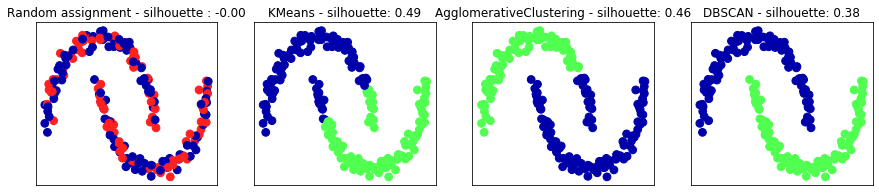

In [22]:
# 使用轮廓系数评估的例子

from sklearn.metrics import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 标准缩放
X_scalled = sklearn.preprocessing.StandardScaler().fit_transform(X)

# 聚类算法
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]
# 创建随机簇分配作为比较
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

fig, axes = plt.subplots(1, 4, figsize=(15, 3), 
                         subplot_kw={'xticks': (), 'yticks': ()})

# 绘制随机分簇结果， 计算调整rank指数
axes[0].scatter(X_scalled[:, 0], X_scalled[:, 1], c=random_clusters,
                cmap=mglearn.cm2, s=60)
axes[0].set_title('Random assignment - silhouette : {:.2f}'
                  .format(silhouette_score(X_scalled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 绘制簇分配和簇中心
    clusters = algorithm.fit_predict(X_scalled)
    ax.scatter(X_scalled[:, 0], X_scalled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title('{} - silhouette: {:.2f}'.
                 format(algorithm.__class__.__name__,
                        silhouette_score(X_scalled, clusters)))

plt.show()

## 人工分析：在人脸数据集上比较算法

### 使用PCA降维数据

In [23]:
X_pca = sklearn.decomposition.PCA(n_components=100).fit_transform(X_people)
# X_pca = X_people

### 使用DBSCAN处理数据

In [24]:
# eps:0.5 min_samples:5
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print('eps:{} min_samples {} - Unique labels:{}'.format(dbscan.eps, dbscan.min_samples, np.unique(labels)))

# eps:0.5 min_samples:3
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print('eps:{} min_samples {} - Unique labels:{}'.format(dbscan.eps, dbscan.min_samples, np.unique(labels)))

# eps:15 min_samples:3
dbscan = DBSCAN(min_samples=10, eps=13)
labels = dbscan.fit_predict(X_pca)
print('eps:{} min_samples {} - Unique labels:{}'.format(dbscan.eps, dbscan.min_samples, np.unique(labels)))

eps:0.5 min_samples 5 - Unique labels:[-1]
eps:0.5 min_samples 3 - Unique labels:[-1]
eps:13 min_samples 10 - Unique labels:[-1  0]


查看噪声点数据

In [25]:
# 计算簇中数据点和噪声点数目
# 使用bincount，由于噪声点标签为-1 对label 加一， 0表示噪声点
counts = np.bincount(labels + 1)
print('nuber of noise:', counts[0])
print('nuber of cluster:', counts[1:])

nuber of noise: 17
nuber of cluster: [2046]


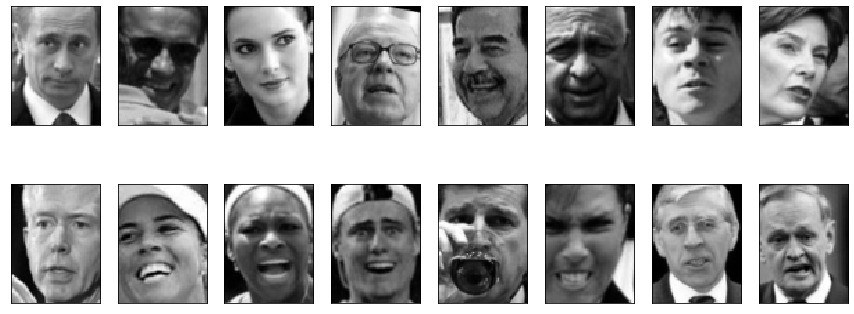

In [26]:
noise = X_people[labels == -1]

fig, axes = plt.subplots(2, 8, figsize=(15,6), subplot_kw={'xticks':(), 'yticks':()})

for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(people.images[0].shape), cmap=plt.cm.gray)
    
plt.show()

测试不同参数的聚类结果

In [27]:
for eps in [1, 3, 5, 6, 7, 9, 11, 13]:
    print('eps=', eps)
    labels = DBSCAN(eps=eps, min_samples=3).fit_predict(X_pca)
    print('cluster present:', np.unique(labels))
    print('cluster sizes', np.bincount(labels + 1))

eps= 1
cluster present: [-1]
cluster sizes [2063]
eps= 3
cluster present: [-1]
cluster sizes [2063]
eps= 5
cluster present: [-1]
cluster sizes [2063]
eps= 6
cluster present: [-1  0  1  2  3  4  5  6  7  8  9 10]
cluster sizes [2015    8    5    6    3    3    5    3    5    3    3    4]
eps= 7
cluster present: [-1  0  1  2  3]
cluster sizes [1732  318    3    4    6]
eps= 9
cluster present: [-1  0  1  2  3]
cluster sizes [ 687 1367    3    3    3]
eps= 11
cluster present: [-1  0]
cluster sizes [ 151 1912]
eps= 13
cluster present: [-1  0]
cluster sizes [  15 2048]


可视化eps=6时结果

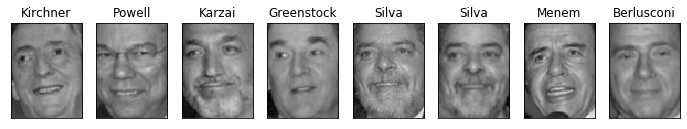

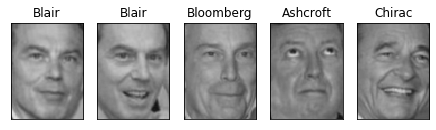

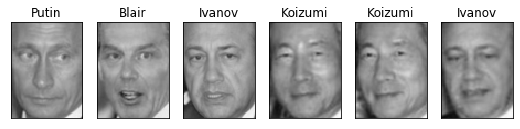

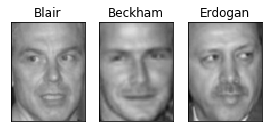

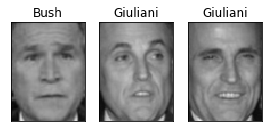

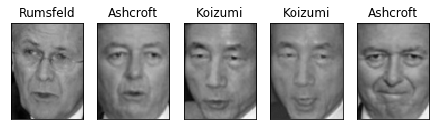

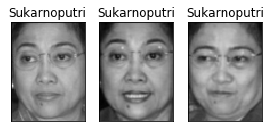

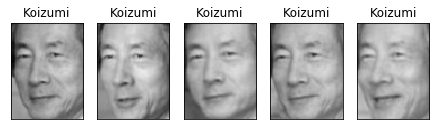

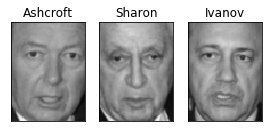

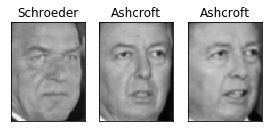

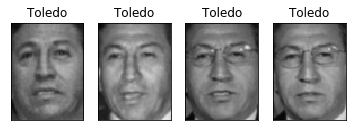

In [28]:
labels = DBSCAN(eps=6, min_samples=3).fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = sum(mask)
    
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), 
                            subplot_kw={'xticks': (), 'yticks': ()})
    
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(people.images[0].shape), cmap=plt.cm.gray, vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
plt.show()

### 使用 k均值处理人脸数据

Cluster size k-means: [198 314 132 171 156 180 202 267 240 203]


<Figure size 432x288 with 0 Axes>

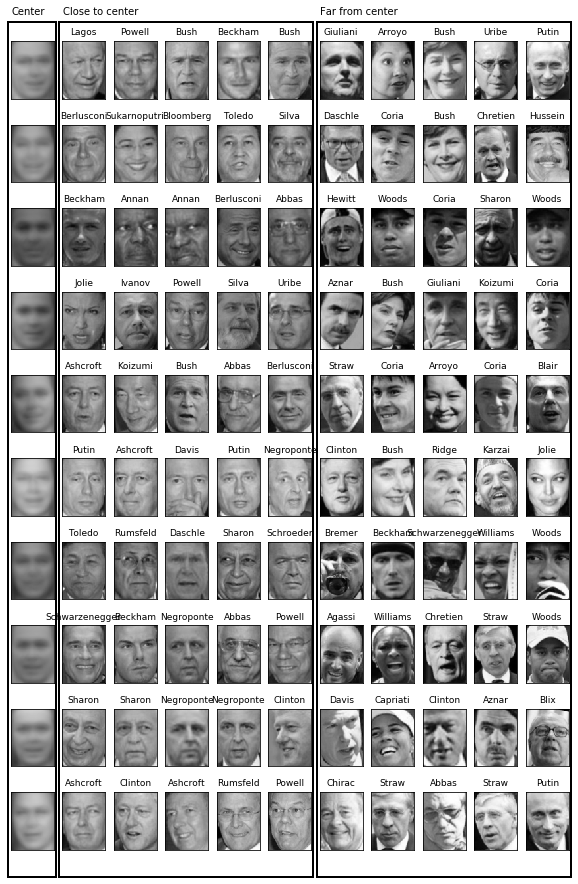

In [29]:
# 设置10个聚类预测标签

kmeans = KMeans(n_clusters=10, random_state=0)
km_labels = kmeans.fit_predict(X_pca)
print('Cluster size k-means:', np.bincount(km_labels))

# 绘制聚类结果
plt.set_cmap(plt.cm.gray)
mglearn.plots.plot_kmeans_faces(kmeans, pca, X_pca, X_people, y_people, people.target_names)
plt.show()

### 使用凝聚聚类处理人脸信息

Cluster sizes agglomerative: [272 180 200 166 374 162 248 177  62 222]
adjusted rand index: 0.23589742970920188


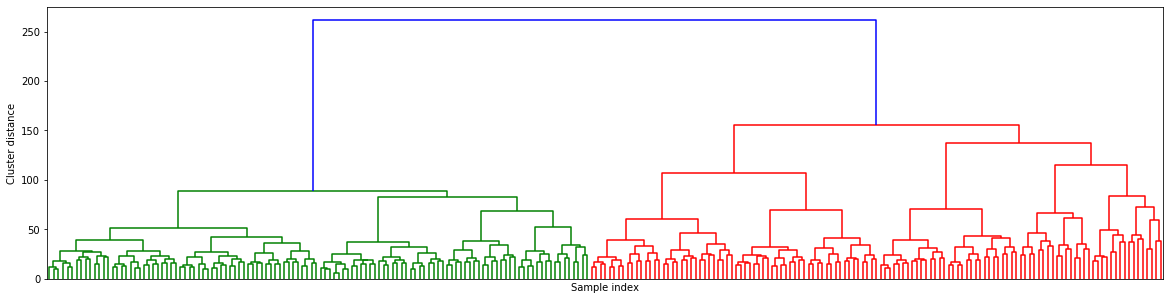

In [30]:
# 预测聚类标签
agglomerative = AgglomerativeClustering(n_clusters=10)
agg_labels = agglomerative.fit_predict(X_pca)
print('Cluster sizes agglomerative:', np.bincount(agg_labels))

# 比较凝聚聚类与kmeans 聚类结果
print('adjusted rand index:', adjusted_rand_score(agg_labels, km_labels))

# 绘制凝聚聚类结果
linkage_array = ward(X_pca)
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')
plt.show()

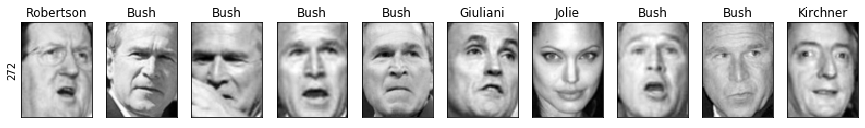

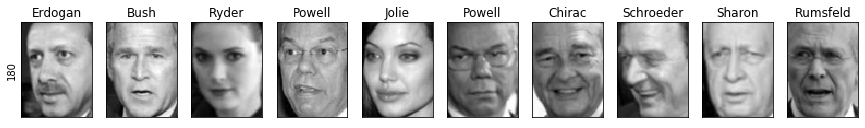

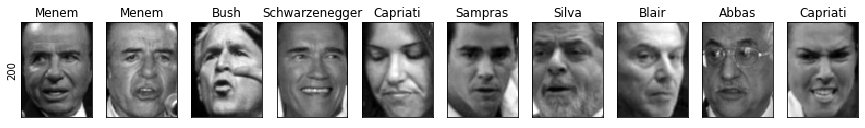

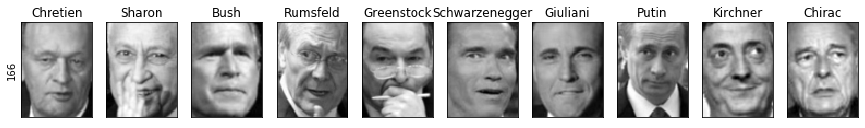

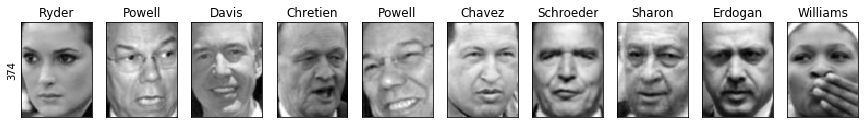

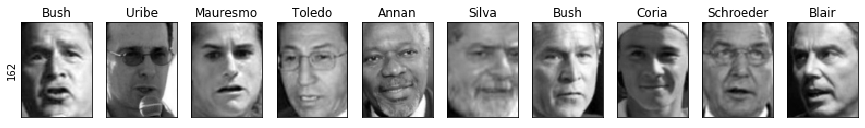

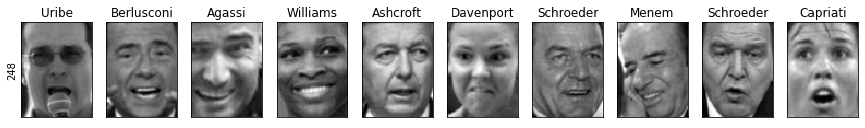

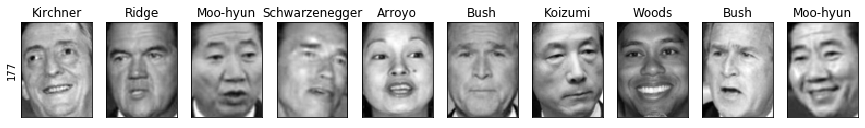

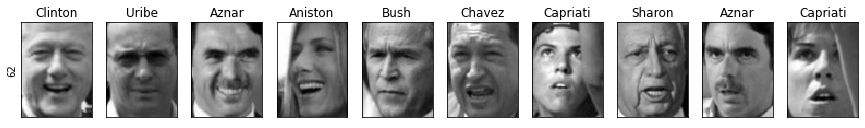

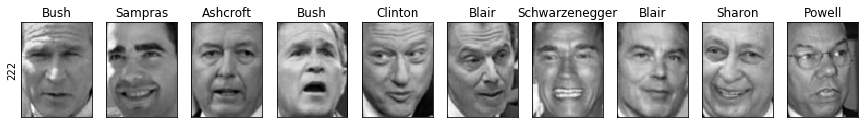

In [31]:
# 可视化预测的10个簇
n_clusters = 10
for cluster in range(n_clusters):
    mask = agg_labels == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks':(), 'yticks':()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(people.images[0].shape), cmap=plt.cm.gray)
        ax.set_title(people.target_names[label].split()[-1])
plt.show()